Checkpoints:

Getting Data

Preparing data

Image Augmentation

Build model and train

use the webcam for detection

## Step 1: Getting Data and Exploring its features

In [25]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Input, GlobalAveragePooling2D, Activation, BatchNormalization, Conv2D, Dropout, Flatten, MaxPooling2D
import os

In [17]:
data=pd.read_csv('dataset/labels.csv')
data.head()

,Unnamed: 0,pth,label,relFCs
0,0,anger/image0000006.jpg,surprise,0.873142
1,1,anger/image0000060.jpg,anger,0.852311
2,2,anger/image0000061.jpg,anger,0.800957
3,3,anger/image0000066.jpg,disgust,0.843079
4,4,anger/image0000106.jpg,anger,0.849108


In [19]:
print("There are " + str(data.shape[0]) + " entries/images in this dataset.")

There are 28175 entries/images in this dataset.


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28175 entries, 0 to 28174
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28175 non-null  int64  
 1   pth         28175 non-null  object 
 2   label       28175 non-null  object 
 3   relFCs      28175 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.6+ KB


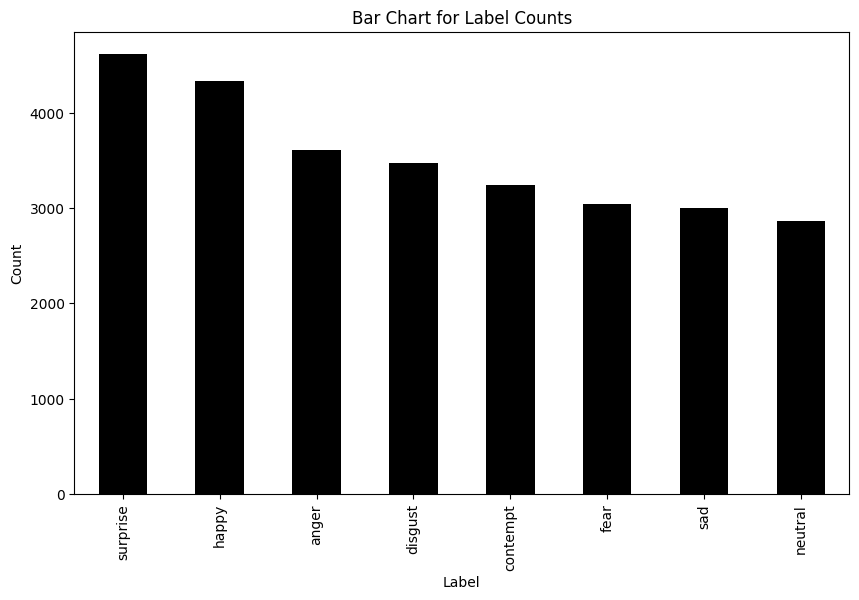

In [10]:
label_counts = data['label'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='black')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Bar Chart for Label Counts')
plt.show()

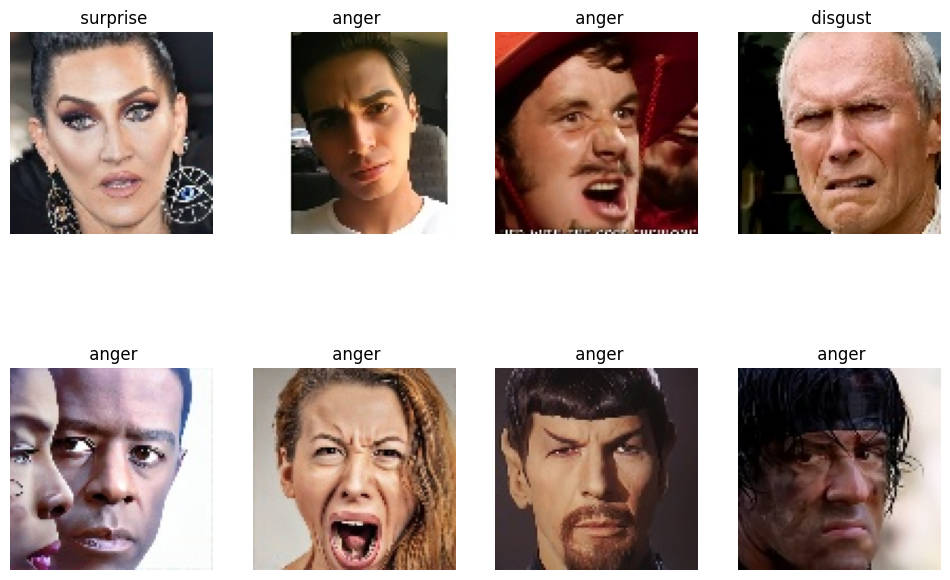

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specifying the path to your image file

def image_show(i):
    pth=data.iloc[i,1]
    image_path = 'dataset/'+pth
    img = mpimg.imread(image_path)
    return img,data.iloc[i,2]

# Displaying the first 8 images from the file
i=8
num_cols=int(i/2)
num_rows=int(i/num_cols)+i%2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i in range(0,i):
    row = i // num_cols
    col = i % num_cols
    img_path,title=image_show(i)
    axes[row, col].imshow(img_path)
    axes[row, col].set_title(f' {title}')
    axes[row, col].axis('off')

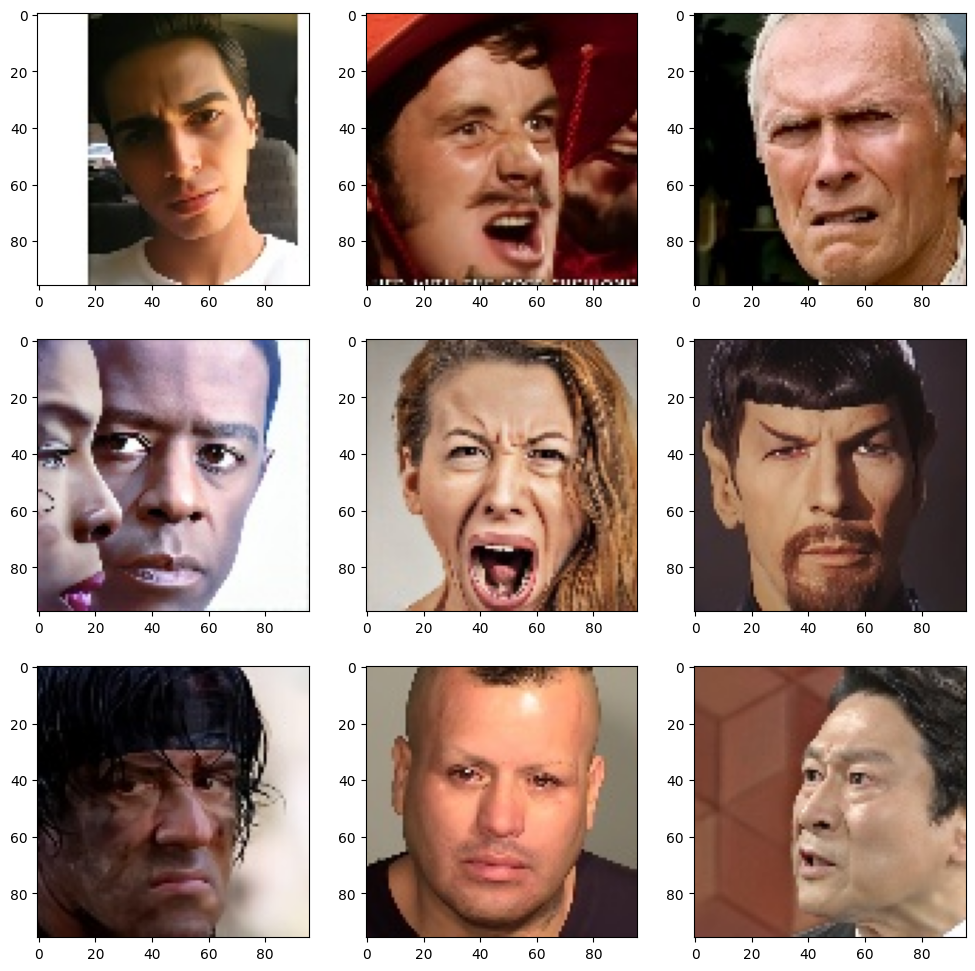

In [29]:
expression = "anger" # list particular emotion to see pictures of it accordingly
picture_size = 96
plt.figure(figsize=(12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("dataset/"+expression+"/"+os.listdir("dataset/" +expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [8]:
# Extract features (image paths) and labels
X = data['pth'].values # getting image path
y = data['label'].values # getting image label

## Preprocessing the Image

# Understanding:
- images contain data of RGB combination. 
- computer doesn't see an image, it only sees an array of numbers.
- color images are stored as 3-D arrays.
- 

In [23]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Input, GlobalAveragePooling2D, Activation, BatchNormalization, Conv2D, Dropout, Flatten, MaxPooling2D
import os

In [ ]:
picture_size = 48
